# Serie RCL-kreds med sinus-output

In [1]:
#Parker importeres:
import numpy as np
import matplotlib.pyplot as plt

#Målte værdier:
Induktans = 40.9 * 10**(-3) #Henry
Kapacitans = 46.5 * 10**(-9) #Farad
Modstand = 33.6 #Ohm

Q = np.sqrt( Induktans / (Kapacitans * Modstand**2 ))
w_max = 1 / np.sqrt(Induktans * Kapacitans)
w_max

22930.412612811622

In [ ]:
#Der laves en liste til faseforskydningerne:
Faseforskydning = []
Amplitude_A = []
Amplitude_B = []

#Frekvenserne der er målt ved:
frek = np.array([27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 ,41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 ,49])*100

#Der gennemgås datasættes for hver eneste frekvens:
for Hz in frek:
    Rådata = np.genfromtxt(f"{frek}Hz.csv" , delimiter=',' , skip_header=2)
    
    #Dataet defineres i seperate mapper:
    Tid = Rådata[:,0]
    CA = Rådata[:,1]
    CB = Rådata[:,2] * 10**(-3)

    #Periden og det totale antal af svinginger findes:
    Periode = 1 / Hz * 10**6
    Antal_svingninger = (Tid[-1]-Tid[0]) / Periode

    #Der laves en liste seperat til kanal A og B:
    SvingA = []
    SvingB = []
    #Der loopes over det totale antal af svingninger:
    for i in range(0,int(Antal_svingninger)):
        #Der laves en maske til at opdele bølgerne i de enkelte perioder:
        Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        
        #Der laves en seperat liste til dataet indenfor hver periode
        xx = Tid[Maske]
        yyA = CA[Maske]
        yyB = CB[Maske]

        #Hver enkelt svingning for de to kanaler A og B gemmes i seperate lister:
        SvingA.append([xx,yyA])
        SvingB.append([xx,yyB])
    #Der plottes bare for se, om det ser okay ud:
    plt.plot(*SvingA[0])
    plt.plot(*SvingB[0])


    #Der findes nu faseforskydningen mellem kanal A og B for hver periode:
    Amp_A = []
    Amp_B = []
    For = []
    for x in range(0,int(Antal_svingninger)):
        For.append(  ( 2*np.pi / Periode * (Tid[ np.where(yyA == np.max(yyA))[0][0] ] - Tid[ np.where(yyB == np.max(yyB))[0][0] ] )  ) )
        Amp_B.append(np.max(SvingB[x][1]))
        Amp_A.append(np.max(SvingA[x][1]))


    #Frekvensen, den gennemsnitlige faseforskygning og den statistiske usikkerhed gemmes i en seperat liste:
    Faseforskydning.append([Hz , np.mean(For) , np.std(For)])
    Amplitude_B.append([Hz , np.mean(Amp_B) , np.std(Amp_B)])
    Amplitude_A.append([Hz , np.mean(Amp_A) , np.std(Amp_A)])

[270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440
 450 460 470 480 490]


FileNotFoundError: [270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440
 450 460 470 480 490]Hz.csv not found.

### Amplitudeforhold

C:\Users\chris\AppData\Local\Temp\ipykernel_11644\872521476.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.sqrt( 1 + Q**2 * ( w / w_max - w_max / w )**2 )


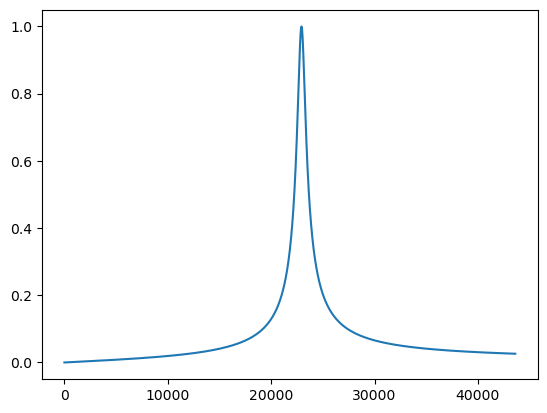

In [45]:
def func_amplitudeforhold(w):
    return 1 / np.sqrt( 1 + Q**2 * ( w / w_max - w_max / w )**2 )

xx = np.linspace(0,1 * 10**(9),10000) / w_max
yy = func_amplitudeforhold(xx)

plt.plot(xx , yy)

### Faseforskydning

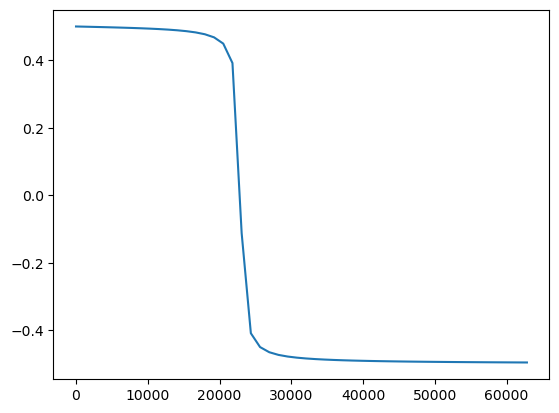

In [ ]:
def func_faseforskydning(w):
    return -np.arctan(Q * (w / w_max - w_max / w))

y_fase = func_faseforskydning(xx) / np.pi

plt.plot(xx , y_fase) 